In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import pickle

# Functions for reading and writing a pickel file

In [40]:
# Save the object in pickel file
def save_obj(path, obj, name):
    with open(path + '/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# Read the object from pickel file
def load_obj(path, name):
    with open(path + '/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Load the data

In [41]:
path = './data'

X = load_obj(path, 'train_image')
y = load_obj(path, 'train_label')

# Convert the data into numpy array

In [42]:
# Lests identify the dtype of data before doing any preprocessing.
print('dtype of X before conversion:', type(X))
print('dtype of y before conversion:', type(y), end='\n\n')

# Conversion into numpy array is done to make the computation faster.
X = np.array(X)
y = np.array(y)

# Printing of shape is done to see if the row count in both data and labels do not mismatch.
print('Shape of data:', X.shape)
print('Shape of labels:', y.shape, end='\n\n')

print('Number of distinct labels:', np.unique(y), end='\n\n')

# Max and min value across row in X
print('Maximum value across row:', np.max(X[0, :]))
print('Minimum value across row:', np.min(X[0, :]))

# Conclusion: it looks row represnts images

dtype of X before conversion: <class 'list'>
dtype of y before conversion: <class 'list'>

Shape of data: (8000, 784)
Shape of labels: (8000,)

Number of distinct labels: [0 2 3 6]

Maximum value across row: 255
Minimum value across row: 0


In [43]:
def get_index_list_for_each_class(_1d):
    output = {}
    uniques = np.unique(_1d)
    for i in uniques:
        output[i] = [j for j in range(len(_1d)) if _1d[j] == i]
        
    return output

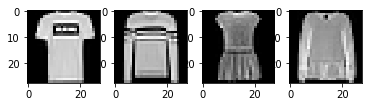

In [47]:
classwise_idx_list = get_index_list_for_each_class(y)

img_class_1 = X[classwise_idx_list[0][0], :].reshape((28, 28))
img_class_2 = X[classwise_idx_list[2][0], :].reshape((28, 28))
img_class_3 = X[classwise_idx_list[3][0], :].reshape((28, 28))
img_class_4 = X[classwise_idx_list[6][0], :].reshape((28, 28))

plt.subplot(141)
plt.imshow(img_class_1, cmap='gray')

plt.subplot(142)
plt.imshow(img_class_2, cmap='gray')

plt.subplot(143)
plt.imshow(img_class_3, cmap='gray')

plt.subplot(144)
plt.imshow(img_class_4, cmap='gray')
plt.show()

In [48]:
def count_plot(X, y, column, title):
    ax = sns.countplot(x=column, data=X.assign(labels=np.array(y)))
    plt.title(title)
    plt.show()

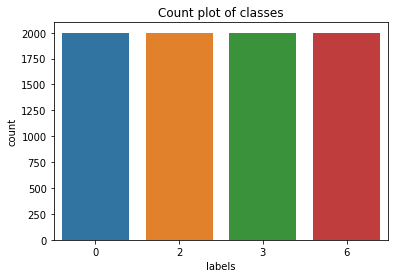

In [50]:
count_plot(pd.DataFrame(X), y, 'labels', 'Count plot of classes')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [54]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape, end='\n\n')

print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape, end='\n\n')

Shape of X_train: (5600, 784)
Shape of y_train: (5600,)

Shape of X_test: (2400, 784)
Shape of y_test: (2400,)

